### Import Necessary Library

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
## Import data and read the data

In [110]:
train1 = pd.read_csv("train_1.csv")

In [111]:
train1.head()

,Ref.No,X1,X2,X3,X4,X5,X6,X7,Y
0,22203,320000,2,1,2,27,1,2,1
1,1288,470000,1,2,1,41,-2,-2,0
2,11822,20000,1,2,2,25,1,2,0
3,15085,80000,1,3,1,41,0,0,1
4,6192,30000,1,1,2,30,1,-2,1


In [112]:
# Drop Ref.No Attribute as it have unique values and are insignificant to the dependent variable 
train1 = train1.drop('Ref.No', axis = 1)

In [113]:
## Data Exploration

In [114]:
# All Attributes are continuous except dependent variable
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21600 entries, 0 to 21599
Data columns (total 8 columns):
X1    21600 non-null int64
X2    21600 non-null int64
X3    21600 non-null int64
X4    21600 non-null int64
X5    21600 non-null int64
X6    21600 non-null int64
X7    21600 non-null int64
Y     21600 non-null int64
dtypes: int64(8)
memory usage: 1.3 MB


In [115]:
train1.shape

(21600, 8)

In [ ]:
train1.describe()

In [ ]:
# Credit given attribute is right skewed
sns.distplot(train1['X1'])
plt.xlabel('Amount of Given Credit')
plt.show()

In [118]:
# There are 13,543 Female, 8057 Male 
train1['X2'].value_counts()

2    13543
1     8057
Name: X2, dtype: int64

In [119]:
train1.corr()

,X1,X2,X3,X4,X5,X6,X7,Y
X1,1.000000,0.034904,-0.227472,-0.105628,0.149632,-0.266460,-0.294104,-0.150885
X2,0.034904,1.000000,0.016744,-0.036408,-0.098736,-0.061844,-0.071631,-0.038559
X3,-0.227472,0.016744,1.000000,-0.139503,0.166523,0.108855,0.126305,0.023008
X4,-0.105628,-0.036408,-0.139503,1.000000,-0.412459,0.013404,0.020276,-0.031020
X5,0.149632,-0.098736,0.166523,-0.412459,1.000000,-0.037337,-0.053494,0.008051
X6,-0.266460,-0.061844,0.108855,0.013404,-0.037337,1.000000,0.669413,0.319002
X7,-0.294104,-0.071631,0.126305,0.020276,-0.053494,0.669413,1.000000,0.258833
Y,-0.150885,-0.038559,0.023008,-0.031020,0.008051,0.319002,0.258833,1.000000


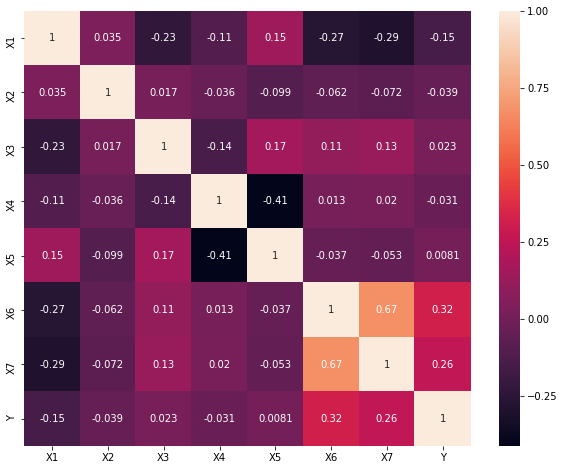

In [120]:
plt.figure(figsize = [10,8])
sns.heatmap(train1.corr(), annot = True)
# X6 and X7 are highly correlated

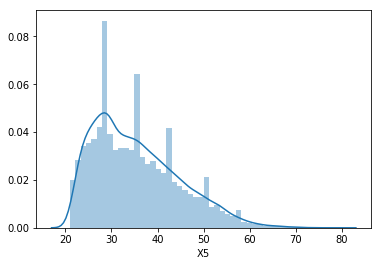

In [121]:
# Max. person in our data are b/w 20-40 years
sns.distplot(train1['X5'])

In [122]:
train1.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'Y'], dtype='object')

In [123]:
col = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'Y']

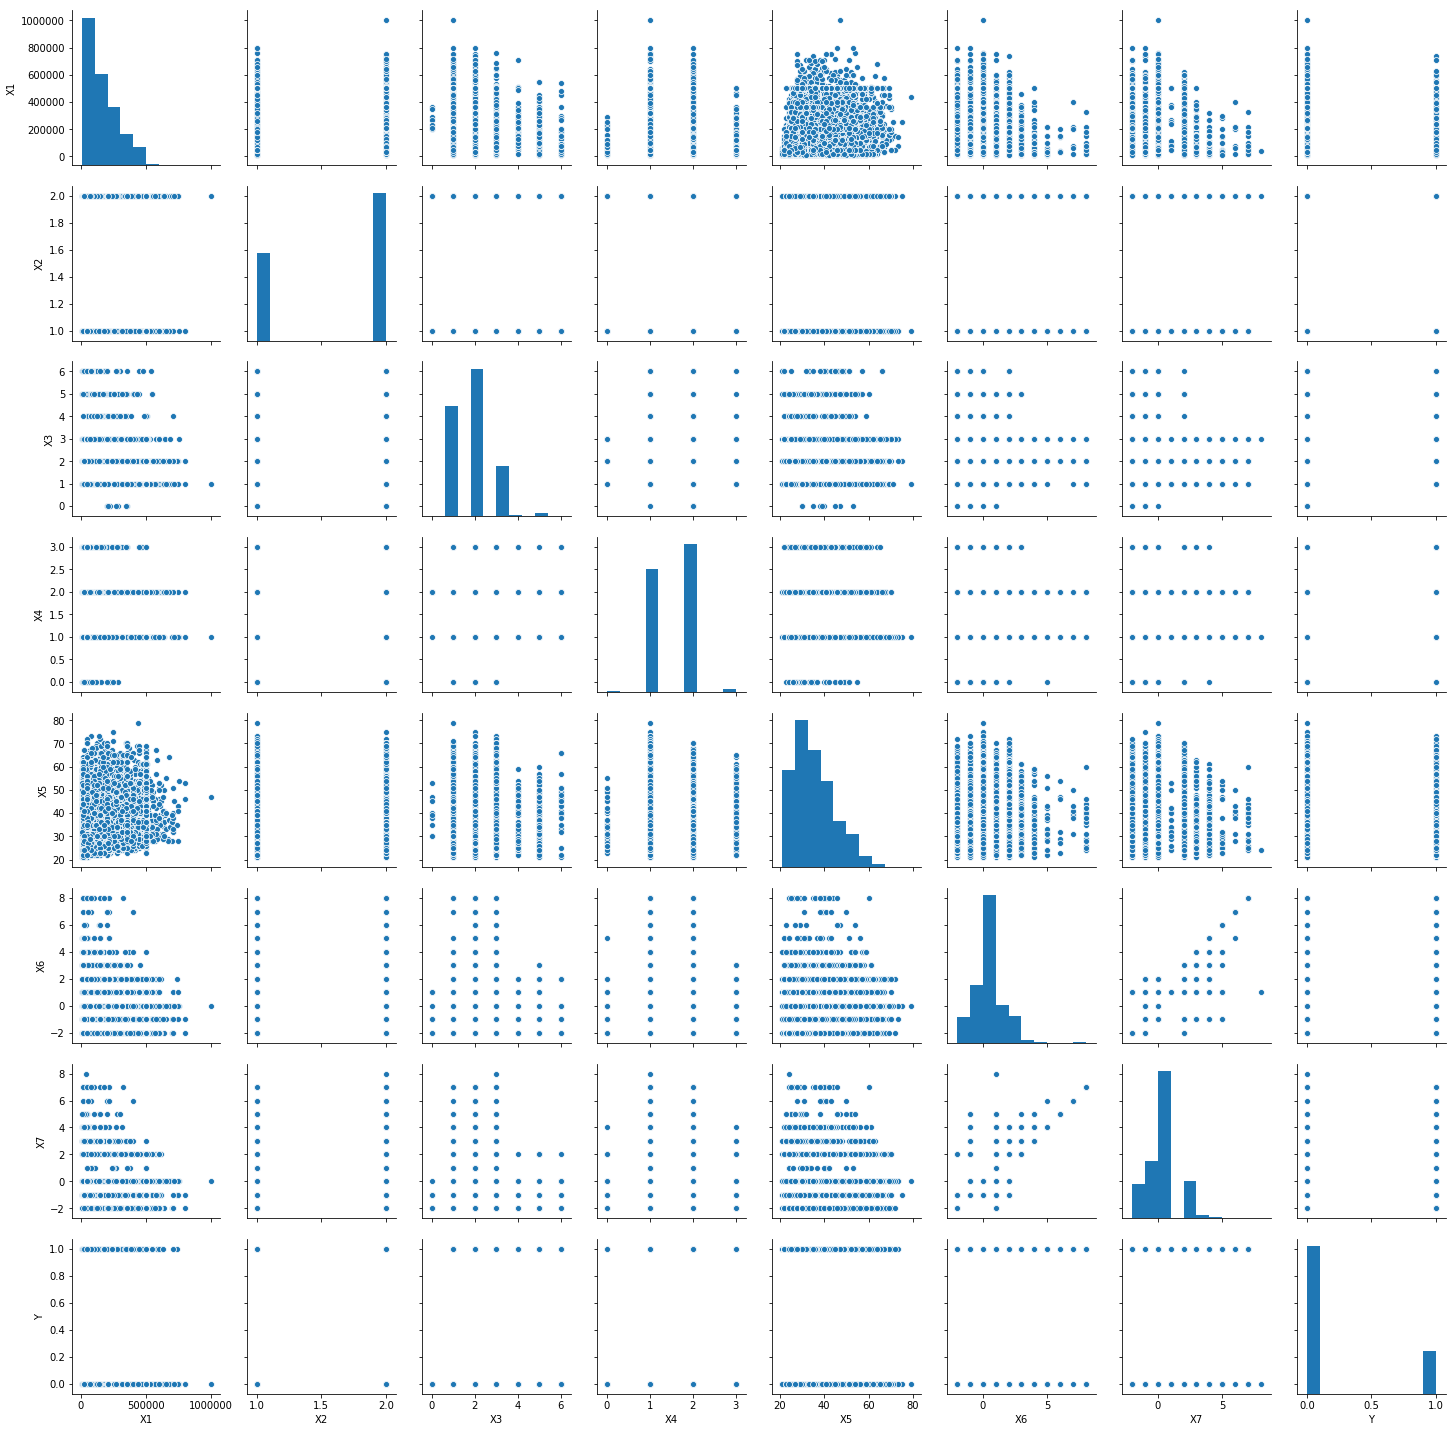

In [124]:
sns.pairplot(train1[col])

### Model Building 

In [125]:
# Separate Independent and Dependent Variable for model building
X = train1.drop('Y', axis = 1)
y = train1['Y']

In [126]:
# Import required library, Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123, test_size = 0.3)

In [128]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\Deepak yadav\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Deepak yadav\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Deepak yadav\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [129]:
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

In [130]:
tree.score(X_test, y_test)

0.8185185185185185

In [131]:
train1['Y'].value_counts()

0    16766
1     4834
Name: Y, dtype: int64

### Convert the data into categorical value to get the dummies

In [132]:
# Convert Data Type from int to category to get the dummies
train1.X2 = train1.X2.astype('int64')
train1.X3 = train1.X3.astype('int64')
train1.X4 = train1.X4.astype('int64')
train1.X6 = train1.X6.astype('int64')
train1.X7 = train1.X7.astype('int64')

In [133]:
train1.X5 = train1.X5.astype('int64')

In [134]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21600 entries, 0 to 21599
Data columns (total 8 columns):
X1    21600 non-null int64
X2    21600 non-null int64
X3    21600 non-null int64
X4    21600 non-null int64
X5    21600 non-null int64
X6    21600 non-null int64
X7    21600 non-null int64
Y     21600 non-null int64
dtypes: int64(8)
memory usage: 1.3 MB


In [135]:
train1d = pd.get_dummies(train1)

In [136]:
train1d.head()

,X1,X2,X3,X4,X5,X6,X7,Y
0,320000,2,1,2,27,1,2,1
1,470000,1,2,1,41,-2,-2,0
2,20000,1,2,2,25,1,2,0
3,80000,1,3,1,41,0,0,1
4,30000,1,1,2,30,1,-2,1


In [137]:
# Perform Standard Scaler and build the model
sc = StandardScaler()

In [138]:
X = train1d.drop('Y', axis = 1)
y = train1d['Y']

In [139]:
# Split the data and claculate the accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size = 0.3)

In [140]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\Deepak yadav\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Deepak yadav\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Deepak yadav\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


In [141]:
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)

In [142]:
tree.fit(X_train,y_train)
ypred = tree.predict(X_test)

In [143]:
# We get the same accuracy so there is no need to do one hot encoding or Dummification here  
tree.score(X_test,y_test)

0.8185185185185185

In [144]:
# Import test data 
test = pd.read_csv("test.csv")

In [145]:
test.head()

,Ref.No,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,17083,50000,2,1,2,25,0,0,0,0,...,38008,31898,20154,2000,5040,8034,3029,5000,49436,NaN
1,3494,120000,2,2,2,24,0,0,0,0,...,6761,7189,1087,1400,1000,0,1000,1087,801,NaN
2,21945,120000,2,2,2,27,1,-2,-1,-1,...,0,0,0,0,2382,0,0,0,0,NaN
3,3499,60000,1,1,2,28,0,-1,0,0,...,9900,310,160,6000,10000,900,310,0,3400,NaN
4,18973,100000,2,1,2,28,3,2,0,0,...,53407,51951,53195,0,1831,4339,0,2083,1939,NaN


In [146]:
test1 = test[['X1','X2','X3','X4','X5','X6','X7']]

### Make Model on Train and Test data

In [147]:
train1.head()

,X1,X2,X3,X4,X5,X6,X7,Y
0,320000,2,1,2,27,1,2,1
1,470000,1,2,1,41,-2,-2,0
2,20000,1,2,2,25,1,2,0
3,80000,1,3,1,41,0,0,1
4,30000,1,1,2,30,1,-2,1


In [148]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21600 entries, 0 to 21599
Data columns (total 8 columns):
X1    21600 non-null int64
X2    21600 non-null int64
X3    21600 non-null int64
X4    21600 non-null int64
X5    21600 non-null int64
X6    21600 non-null int64
X7    21600 non-null int64
Y     21600 non-null int64
dtypes: int64(8)
memory usage: 1.3 MB


In [149]:
test1.head()

,X1,X2,X3,X4,X5,X6,X7
0,50000,2,1,2,25,0,0
1,120000,2,2,2,24,0,0
2,120000,2,2,2,27,1,-2
3,60000,1,1,2,28,0,-1
4,100000,2,1,2,28,3,2


In [150]:
X = train1.drop('Y', axis = 1)
y = train1['Y']

In [151]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21600 entries, 0 to 21599
Data columns (total 7 columns):
X1    21600 non-null int64
X2    21600 non-null int64
X3    21600 non-null int64
X4    21600 non-null int64
X5    21600 non-null int64
X6    21600 non-null int64
X7    21600 non-null int64
dtypes: int64(7)
memory usage: 1.2 MB


In [152]:
X_train = sc.fit_transform(X)
X_test = sc.transform(test1)

C:\Users\Deepak yadav\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Deepak yadav\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Deepak yadav\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


In [153]:
X_train.shape

(21600, 7)

### Decison Tree 

In [154]:
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
tree.fit(X_train, y)
ypred = tree.predict(X_test)

In [155]:
ypred

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [156]:
df1 = pd.DataFrame(np.arange(1,2400), columns = ['Ref.No'])

In [157]:
df2 = pd.DataFrame(ypred, columns = ['Y'])

In [158]:
submission = pd.concat([df1,df2], axis = 1)

In [159]:
submission.to_csv('Submission1.csv', index = False)

In [160]:
# Accuracy with Dcision Tree have max_depth = 3 is 0.81492

### Random Forest

In [220]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [162]:
RF = RandomForestClassifier(criterion = 'entropy', max_depth = 3)
RF.fit(X_train, y)
rfpred = RF.predict(X_test)

In [163]:
rf1 = pd.DataFrame(np.arange(1,2400), columns = ['Ref.No'])

In [164]:
rf2 = pd.DataFrame(rfpred, columns = ['Y'])

In [165]:
RfSubmission = pd.concat([rf1,rf2], axis = 1)

In [166]:
RfSubmission.to_csv("RFSubmission.csv", index = False)

In [167]:
## Import train 2
train2 = pd.read_csv("train_2.csv")

In [168]:
train2.head()

,Ref.No,X8,X9,X10,X11,X12,X13,X14,X15
0,22203,2,2,2,2,43243,42537,41370,40694
1,1288,-2,-2,-2,-1,13780,12242,32463,20621
2,11822,0,0,0,0,20415,18266,18921,19297
3,15085,0,0,0,-1,76015,77582,60311,62471
4,6192,-2,-2,-2,-2,0,0,0,0


In [169]:
# Drop Ref.No column
train2 = train2.drop('Ref.No', axis = 1)

In [170]:
train2.head()

,X8,X9,X10,X11,X12,X13,X14,X15
0,2,2,2,2,43243,42537,41370,40694
1,-2,-2,-2,-1,13780,12242,32463,20621
2,0,0,0,0,20415,18266,18921,19297
3,0,0,0,-1,76015,77582,60311,62471
4,-2,-2,-2,-2,0,0,0,0


In [171]:
train = pd.concat([train1, train2], axis = 1)

In [172]:
train.head()

,X1,X2,X3,X4,X5,X6,X7,Y,X8,X9,X10,X11,X12,X13,X14,X15
0,320000,2,1,2,27,1,2,1,2,2,2,2,43243,42537,41370,40694
1,470000,1,2,1,41,-2,-2,0,-2,-2,-2,-1,13780,12242,32463,20621
2,20000,1,2,2,25,1,2,0,0,0,0,0,20415,18266,18921,19297
3,80000,1,3,1,41,0,0,1,0,0,0,-1,76015,77582,60311,62471
4,30000,1,1,2,30,1,-2,1,-2,-2,-2,-2,0,0,0,0


In [173]:
X = train.drop('Y', axis = 1)
y = train['Y']

In [174]:
test.columns    

Index(['Ref.No', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [175]:
test2 = test[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10','X11', 'X12', 'X13', 'X14', 'X15']]

In [179]:
test2.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15
0,50000,2,1,2,25,0,0,0,0,0,0,45342,44719,40002,38008
1,120000,2,2,2,24,0,0,0,0,0,-1,11296,12200,11761,6761
2,120000,2,2,2,27,1,-2,-1,-1,-2,-2,0,0,2382,0
3,60000,1,1,2,28,0,-1,0,0,-1,2,2295,5293,13421,9900
4,100000,2,1,2,28,3,2,0,0,2,0,49961,48856,49899,53407


In [180]:
X_train = sc.fit_transform(X)
X_test = sc.transform(test2)

C:\Users\Deepak yadav\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Deepak yadav\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Deepak yadav\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


rf = RandomForestClassifier()

params = {"max_depth":range(1,15), "n_estimators":range(1,50)}

grid = GridSearchCV(rf, params, cv = 20)

grid.fit(X_train,y)

### Decision Tree With Grid Search

In [ ]:
tree = DecisionTreeClassifier()
params = {"min_samples_split": range(2,10), "min_samples_leaf": range(1,10)}
grid = GridSearchCV(tree, params, cv = 20)
grid.fit(X_train, y)

In [ ]:
grid.best_params_

In [ ]:
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth=3, min_samples_leaf = 9, min_samples_split = 8 )
tree.fit(X_train, y)
tpred = tree.predict(X_test) # 0.81450

In [ ]:
submit = pd.DataFrame({'Ref.No':np.arange(1,2400), 'Y':tpred})

In [ ]:
submit.to_csv("besttree.csv", index = False)

In [ ]:
bagg = BaggingClassifier(base_estimator=tree, n_estimators = 100)
bagg.fit(X_train, y)
baggpred = bagg.predict(X_test)

In [ ]:
submit = pd.DataFrame({'Ref.No':np.arange(1,2400), 'Y':baggpred})

In [ ]:
submit.to_csv("Bagging.csv", index = False)

### Adaboost

In [ ]:
ada = AdaBoostClassifier()
ada.fit(X_train,y)
adapred = ada.predict(X_test)

In [ ]:
submit = pd.DataFrame({'Ref.No':np.arange(1,2400), 'Y':adapred})

In [ ]:
submit.to_csv("AdaBoost.csv", index = False)

### Gradient Boosting

In [ ]:
gbm = GradientBoostingClassifier()
gbm.fit(X_train,y)
gbmpred = gbm.predict(X_test)

In [ ]:
submit = pd.DataFrame({'Ref.No':np.arange(1,2400), 'Y':gbmpred})

In [ ]:
submit.to_csv("GradientBoost.csv", index = False)

### KNN

knn = KNeighborsClassifier()

params = {'n_neighbors':range(1,10)}

grid = GridSearchCV(knn, params, cv = 20)

grid.fit(X_train,y)

In [ ]:
## Import Train 3 file

In [181]:
train3 = pd.read_csv('train_3.csv')

In [182]:
train3.head()

,Ref.No,X16,X17,X18,X19,X20,X21,X22,X23
0,22203,39606,38680,2000,1500,2000,1500,1500,0
1,1288,13711,8294,12300,32520,34,68,8334,45684
2,11822,18926,17717,1264,1249,625,700,1000,1000
3,15085,21071,2099,3008,3000,5000,10000,2099,0
4,6192,0,0,0,0,0,0,0,0


In [184]:
# Drop Ref.No from train
train3 = train3.drop('Ref.No', axis = 1)

In [192]:
train = pd.concat([train,train3], axis = 1)

In [197]:
train.shape

(21600, 24)

In [200]:
X = train.drop('Y', axis = 1)
y = train['Y']

In [201]:
X.shape

(21600, 23)

In [203]:
test = test.drop(['Ref.No','Y'], axis = 1)

In [204]:
test.shape

(2399, 23)

In [205]:
X_train = sc.fit_transform(X)
X_test = sc.transform(test)

C:\Users\Deepak yadav\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Deepak yadav\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Deepak yadav\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


In [207]:
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
tree.fit(X_train,y)
treepred = tree.predict(X_test)

In [208]:
submit = pd.DataFrame({'Ref.No':np.arange(1,2400), 'Y':treepred})

In [209]:
submit.to_csv("DecisionTree.csv", index = False)
# Accuracy = 0.81450

In [210]:
# Now find bast params for decision tree

In [213]:
tree = DecisionTreeClassifier()
params = {"max_depth":(1,10), "min_samples_split": range(2,10), "min_samples_leaf": range(1,10)}
grid = GridSearchCV(tree, params, cv = 20)
grid.fit(X_train, y)

GridSearchCV(cv=20, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': (1, 10), 'min_samples_split': range(2, 10), 'min_samples_leaf': range(1, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [214]:
grid.best_params_

{'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [217]:
tree = DecisionTreeClassifier(max_depth = 1, min_samples_leaf = 1, min_samples_split = 2)
tree.fit(X_train, y)
treepred1 = tree.predict(X_test)

In [218]:
submit = pd.DataFrame({'Ref.No':np.arange(1,2400), 'Y':treepred1})

In [219]:
submit.to_csv("DecisionTreeBest.csv", index = False)
# Accuracy  = 0.81325

In [221]:
# SVM
sv = SVC()
sv.fit(X_train,y)
svpred = sv.predict(X_test)

In [222]:
submit = pd.DataFrame({'Ref.No':np.arange(1,2400), 'Y':svpred})

In [223]:
submit.to_csv("SVM.csv", index = False)
# Accuracy = 0.81492

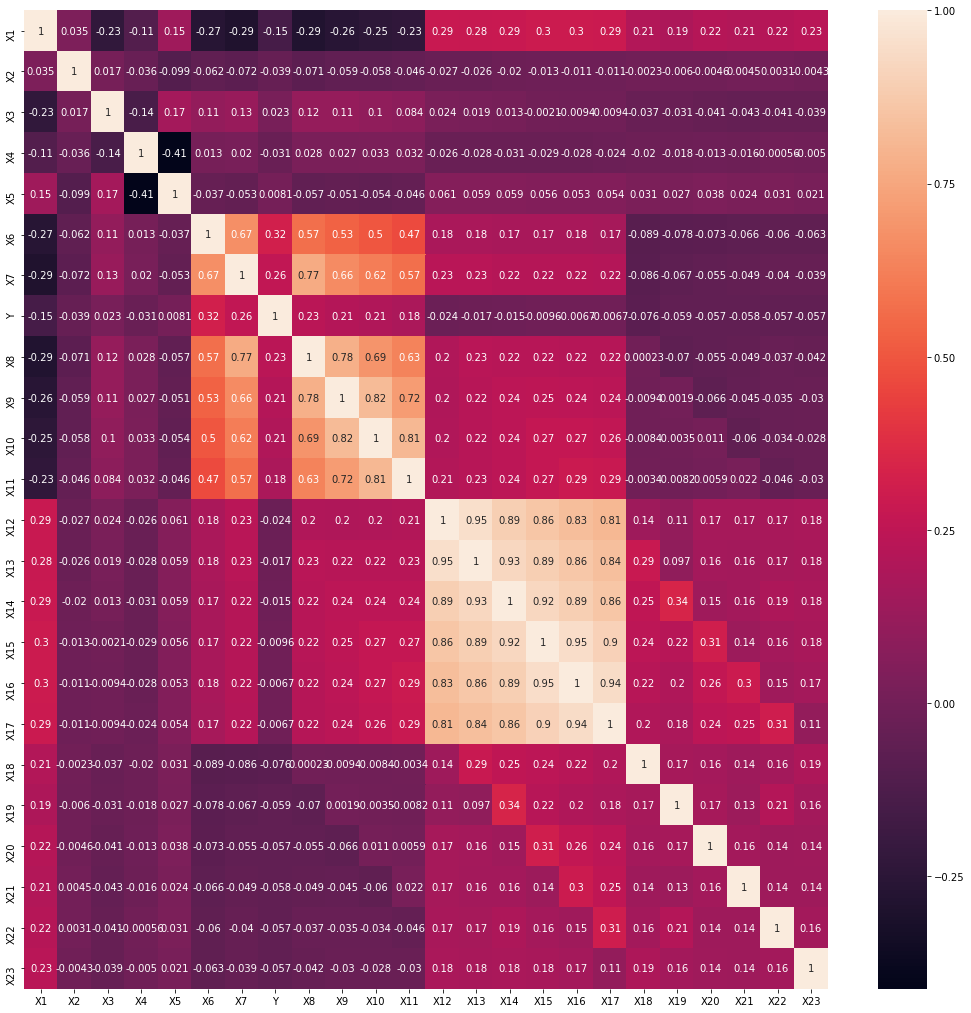

In [241]:
plt.figure(figsize = [18,18])
sns.heatmap(train.corr(), annot = True)